# Earth's orbit (Euler integrator)

Develop a simulation of the motion of the Earth around the sun.

We will use the *Euler* integrator for conceptual simplicity.

(This notebook was life-coded and lightly annotated afterwards.)

In [1]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

Define constants

In [2]:
m_earth = 3.00346e-6  # in solar masses
M_sun = 1.
G = 4*np.pi**2

v0y = 2*np.pi       # initial velocity AU/yr
r0x = 1.0           # AU

Initial conditions: initial position $\mathbf{r}_0 = \mathbf{r}(t=0)$ and initial velocity $\mathbf{v}_0 = \mathbf{v}(t=0)$.

In [3]:
r0 = np.array([r0x, 0])
v0 = np.array([0, v0y])

Integrate the equations of motions:

In [4]:
dt = 1e-5   # in years
t_max = 1.  # year
N_steps = int(t_max / dt)

r = np.zeros(2)  # (x, y)
v = np.zeros(2)  # (vx, vy)
t = 0

def F_gravity(r, m, M):
    rlength = np.sqrt(np.sum(r*r))
    return -G*m*M/rlength**3 * r

# initial conditions
r[:] = r0
v[:] = v0

r_values = [r0]
v_values = [v0]
t_values = [t]

for i in range(N_steps):
    t += dt
    
    # Euler
    a = F_gravity(r, m_earth, M_sun)/m_earth

    r_new = r + dt*v
    v_new = v + dt*a
    
    r_values.append(r_new)
    v_values.append(v_new)
    t_values.append(t)

    r[:] = r_new
    v[:] = v_new

# turn lists of results into arrays for easier processing
r_values = np.array(r_values)
v_values = np.array(v_values)
t_values = np.array(t_values)

Plot the orbit $\mathbf{r}(t)$ in the $x$-$y$ plane:

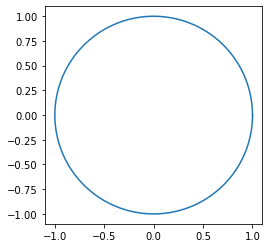

In [5]:
ax = plt.subplot(1,1,1)
ax.plot(r_values[:, 0], r_values[:, 1])
ax.set_aspect(1)

For 1 year that looks as expected; but note that we had to choose a very small $\Delta t = 10^{-5}\,\text{yr}$.

In [6]:
r_values[:, 0]

array([1.        , 1.        , 1.        , ..., 1.00078166, 1.0007819 ,
       1.00078215])